In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from src.XAI.concept import Concept
from src.XAI.concepts import concept_instances

In [3]:
env_steps = Concept.load_concept_data()

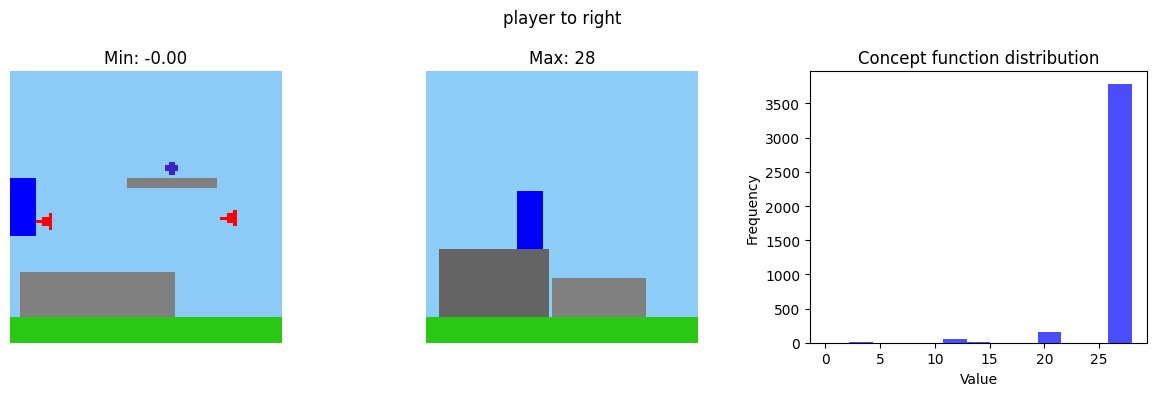

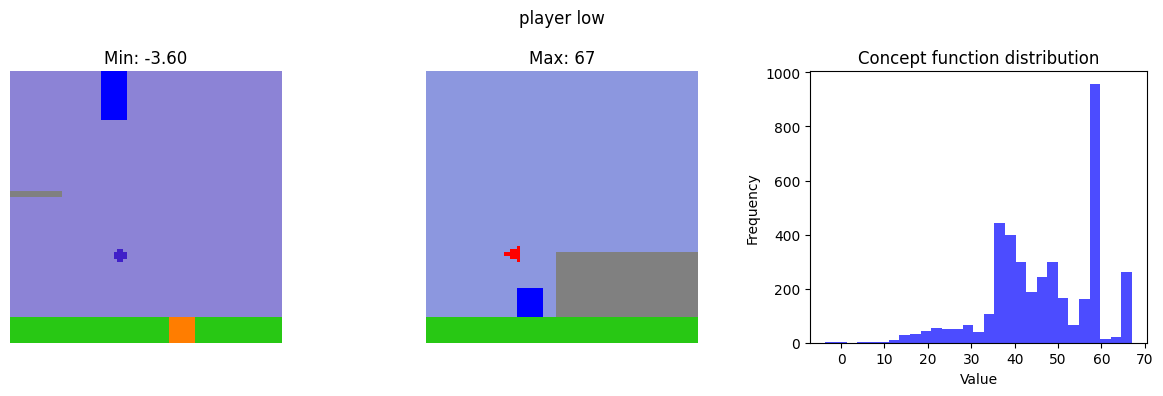

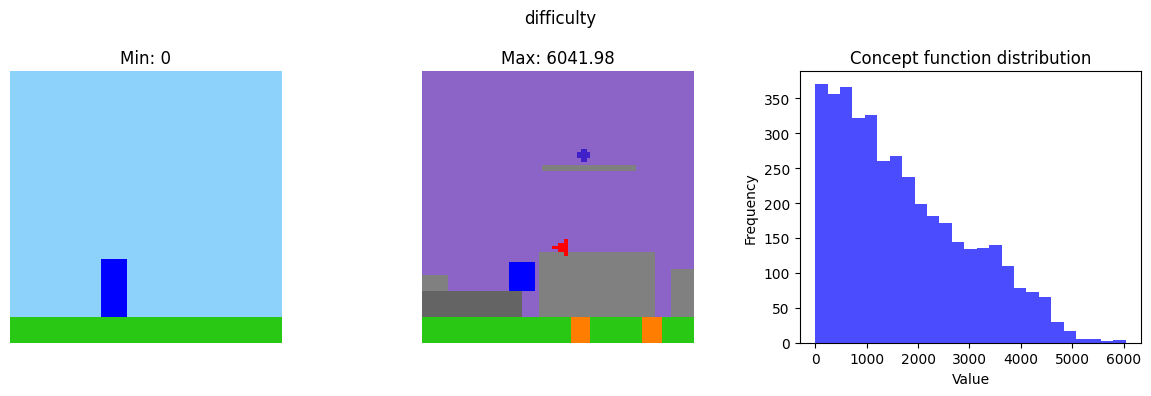

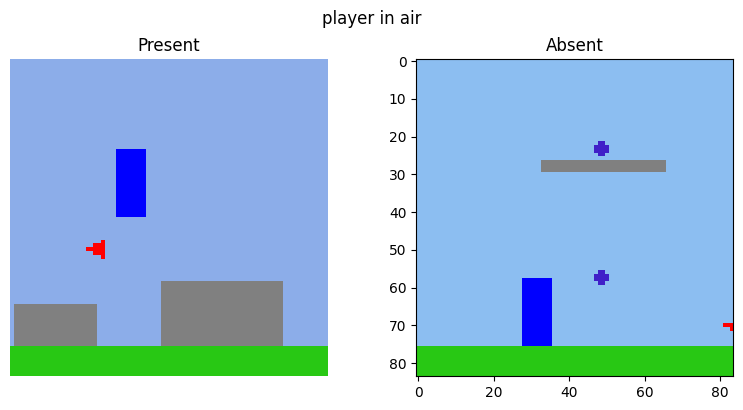

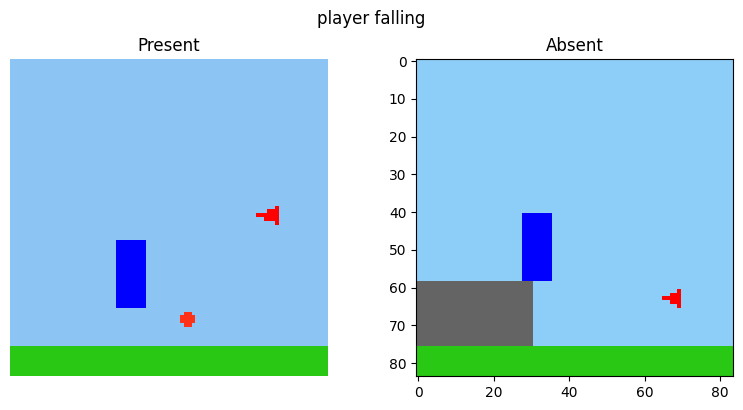

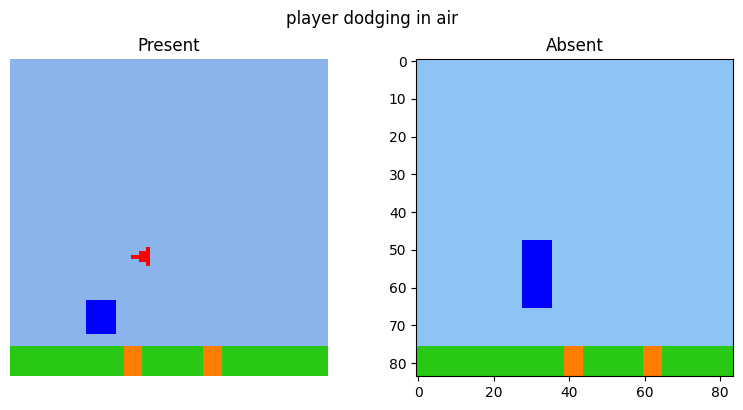

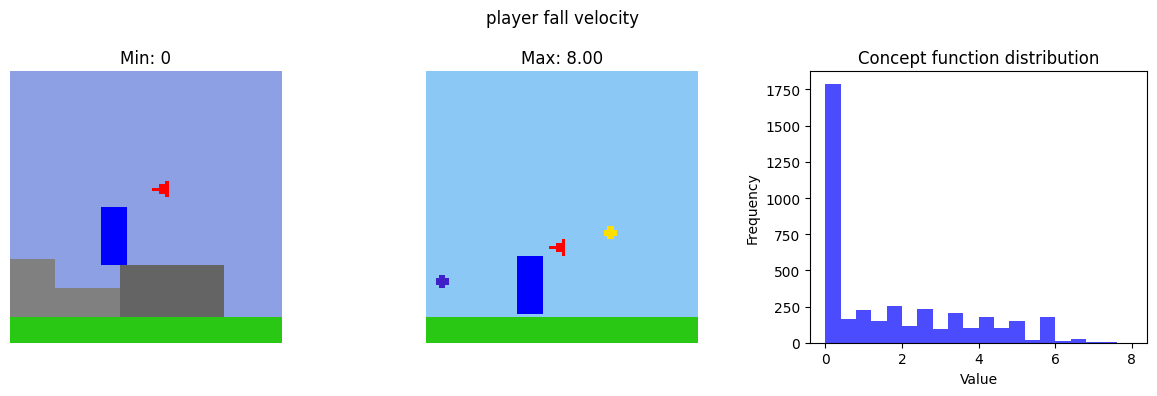

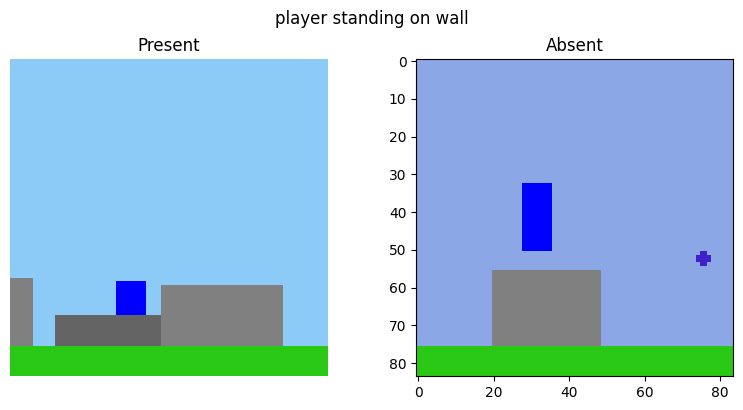

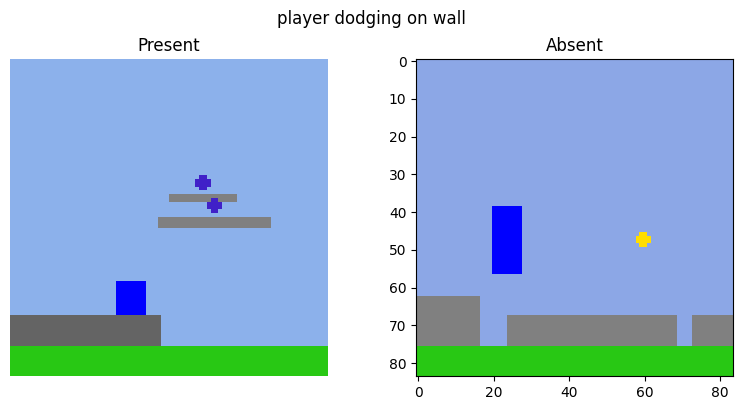

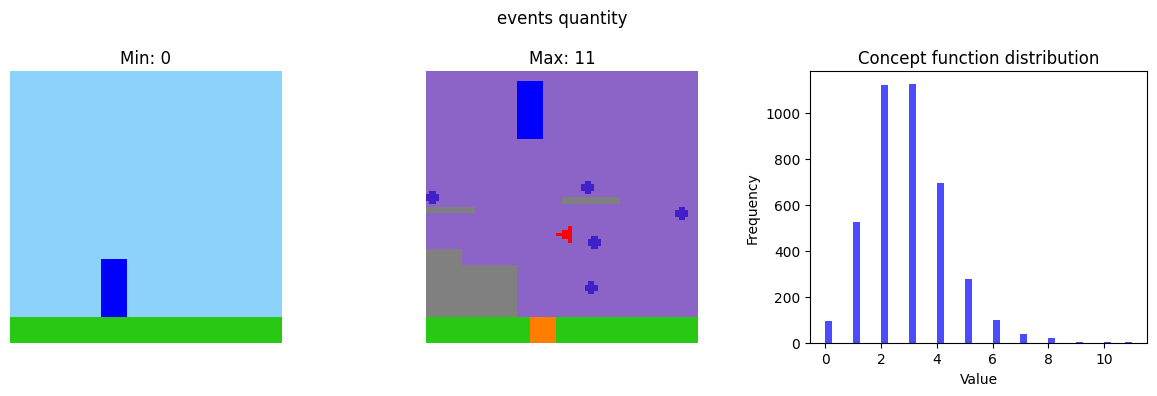

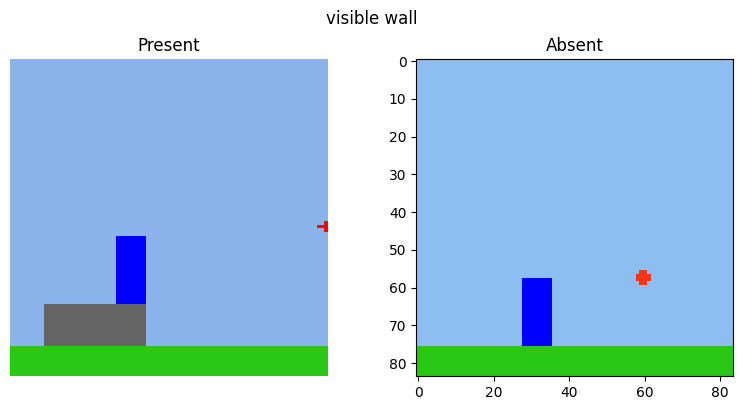

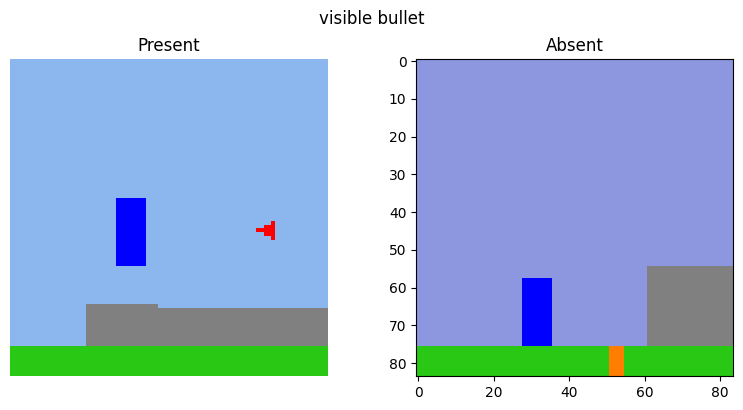

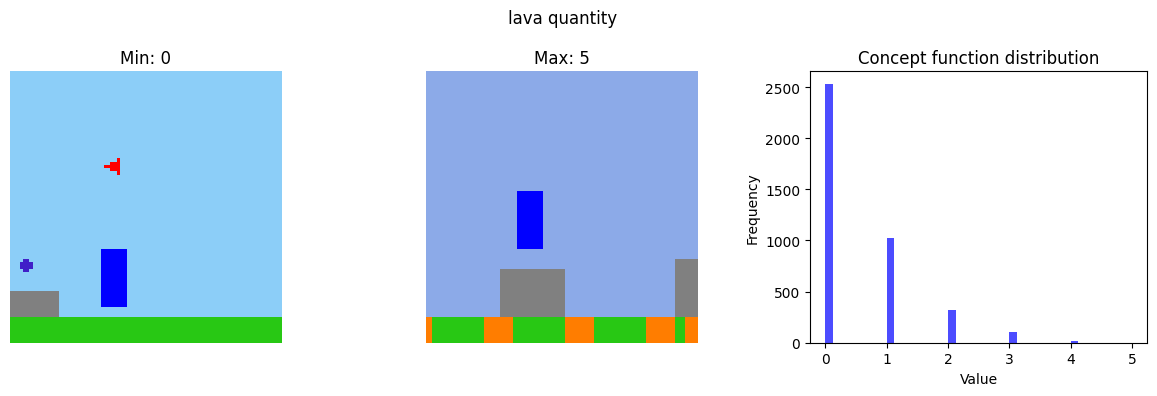

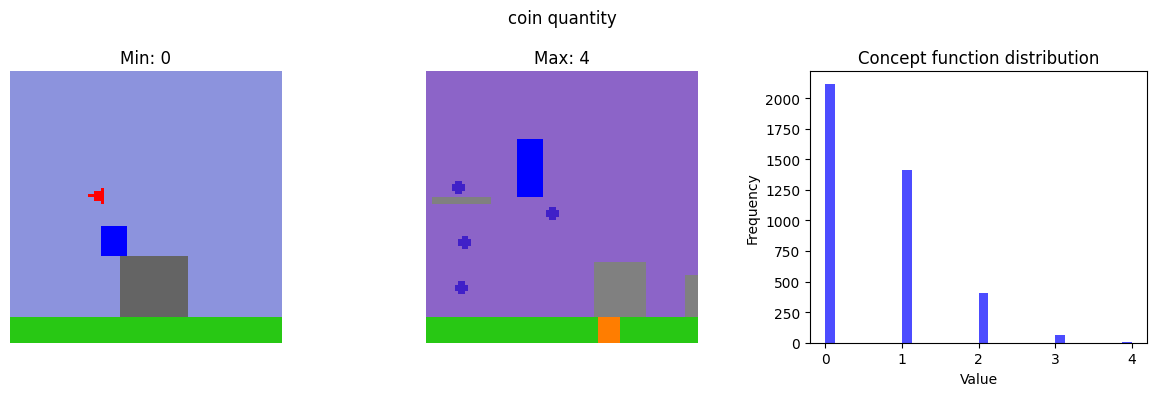

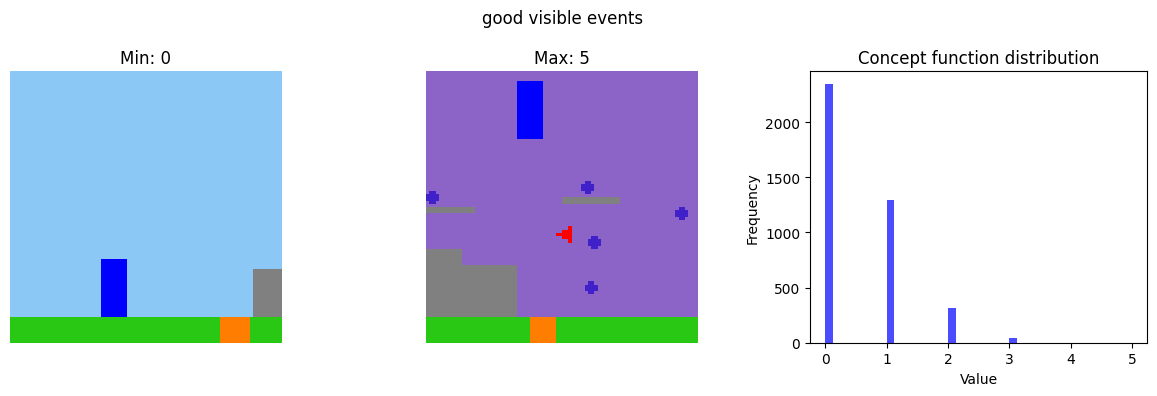

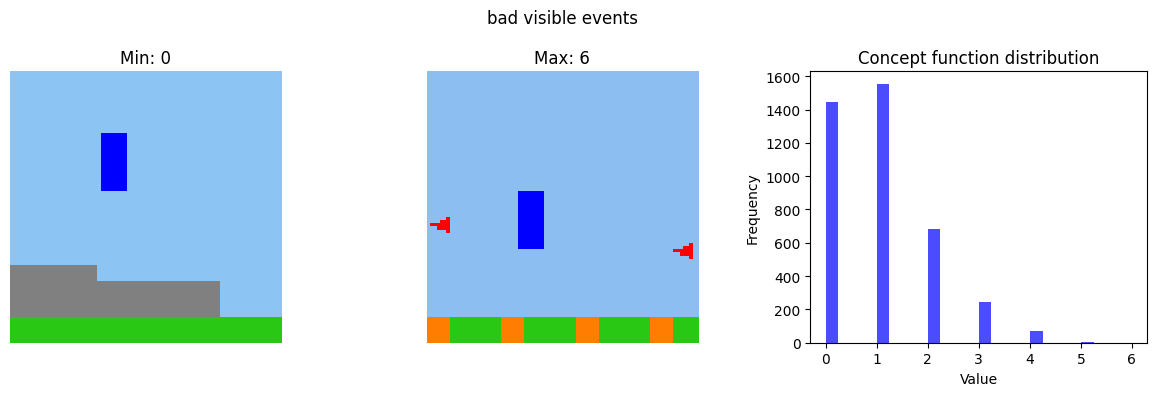

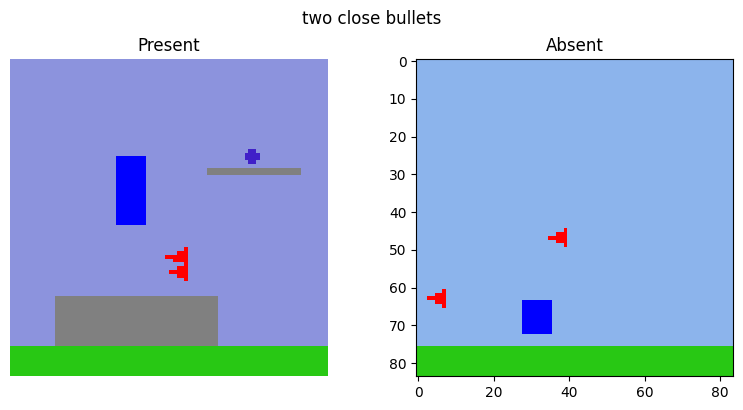

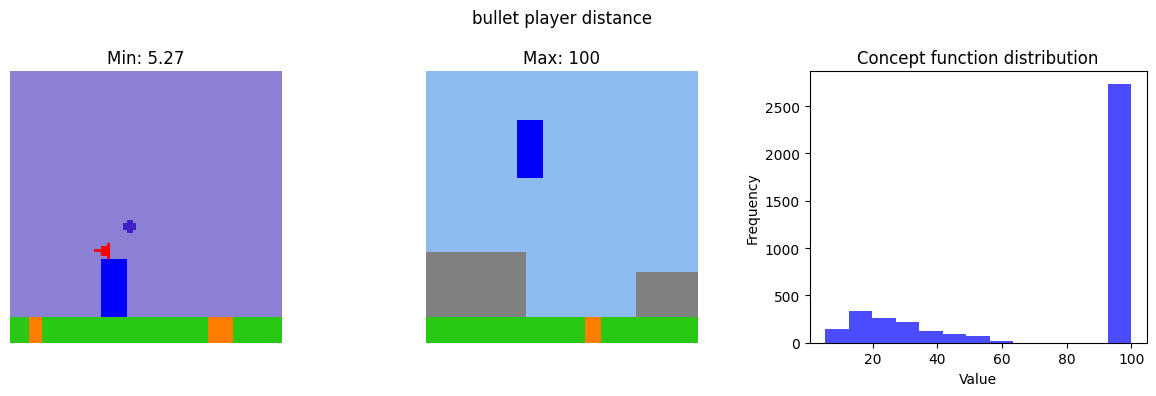

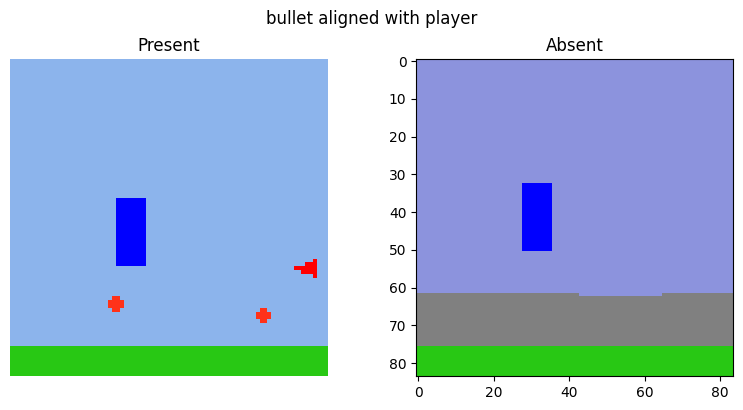

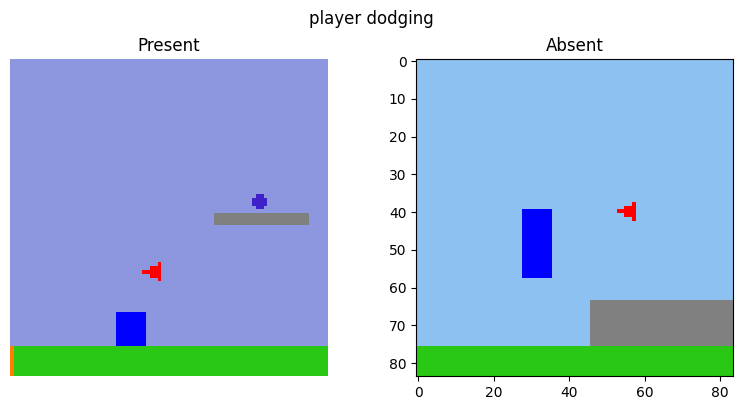

In [4]:
# For each concept show: 
# Presence and absence (binary)
# Or minimum and maximum value (non-binary)
for concept_name, concept in concept_instances.items():
    concept.prepare_data(env_steps, max_size=5000)

    if concept.binary:
        # Binary Concept
        presence_index = np.where(concept.train_values == 1)[0]
        absence_index = np.where(concept.train_values == 0)[0]
        presence_index = np.random.choice(presence_index, 1)
        absence_index = np.random.choice(absence_index, 1)
        presence_images = concept.train_images[presence_index]
        absence_images = concept.train_images[absence_index]

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(concept_name)
        ax[0].imshow(presence_images[0])
        ax[1].imshow(absence_images[0])
        ax[0].set_title('Present')
        ax[1].set_title('Absent')
    else:
        # Non-Binary Concept
        min_index = np.argmin(concept.train_values)
        max_index = np.argmax(concept.train_values)
        min_image = concept.train_images[min_index]
        max_image = concept.train_images[max_index]

        fig, ax = plt.subplots(1, 3, figsize=(12, 4))
        fig.suptitle(concept_name)
        ax[0].imshow(min_image)
        ax[1].imshow(max_image)
        
        min_value = concept.train_values[min_index]
        max_value = concept.train_values[max_index]
        ax[0].set_title(f'Min: {min_value:.0f}' if min_value.is_integer() else f'Min: {min_value:.2f}')
        ax[1].set_title(f'Max: {max_value:.0f}' if max_value.is_integer() else f'Max: {max_value:.2f}')
        
        # Plotting the distribution with smaller bins for more detail
        ax[2].hist(concept.train_values, bins='auto', color='blue', alpha=0.7)
        ax[2].set_title('Concept function distribution')
        ax[2].set_xlabel('Value')
        ax[2].set_ylabel('Frequency')

    for a in ax[:-1]:
        a.axis('off')

    plt.tight_layout()
    plt.show()